<a href="https://colab.research.google.com/github/jahidhasan299/jahidhasan299-Deep-Learning-With-7-Real-Projects/blob/main/7_Steps_to_building_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load data and understand the problem to be solved: Plot data, is it balanced, do you have enough data, do you need image augmentation, is it large data that doesn't fit memory, etc.

2. Cleanup and preprocess data: Remove null for structured data, extract features if not provided, select/drop appropriate features, balance classes, scale/normalize data, etc.

3. Get data ready for training: Reshape data and define X_train, X_test, X_val, y_train, y_test, y_val, define augmentation

4. Define the model: How many layers, appropriate activation functions, do you need to add dropout, appropriate optimizer, loss, metrics, use transfer learning?

5. Train the model: Ensure enough validation data for good accuracy checks during training.

6. Re-train, if necessary: Check accuracy on test data, understand learning curves and continue training the model, if needed.

7. Save the model for future use:


# 1. Load data and understand the problem to be solved: 
Plot data, is it balanced, do you have enough data, do you need image augmentation, is it large data that doesn't fit memory, etc.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/data.csv")
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [3]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

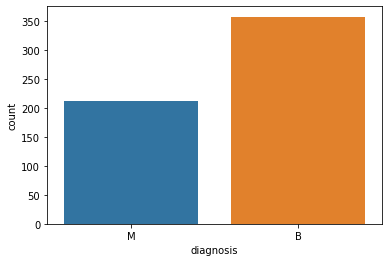

In [4]:
# Uderstand the data
sns.countplot(x='diagnosis', data=df) # M - malignant   B - benign

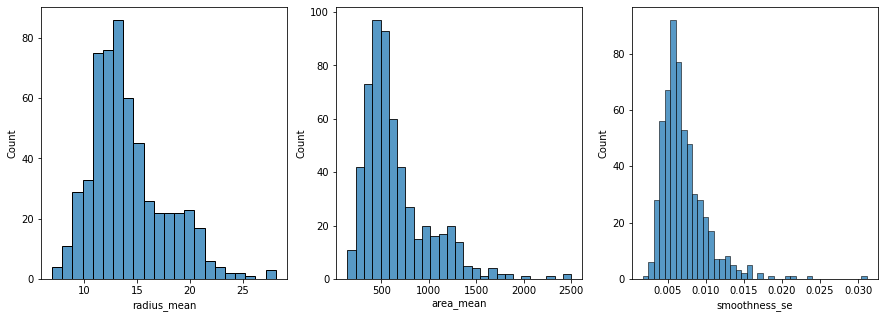

In [5]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(df['radius_mean'], ax=ax[0])
sns.histplot(df['area_mean'], ax=ax[1])
sns.histplot(df['smoothness_se'], ax=ax[2])

fig.show()

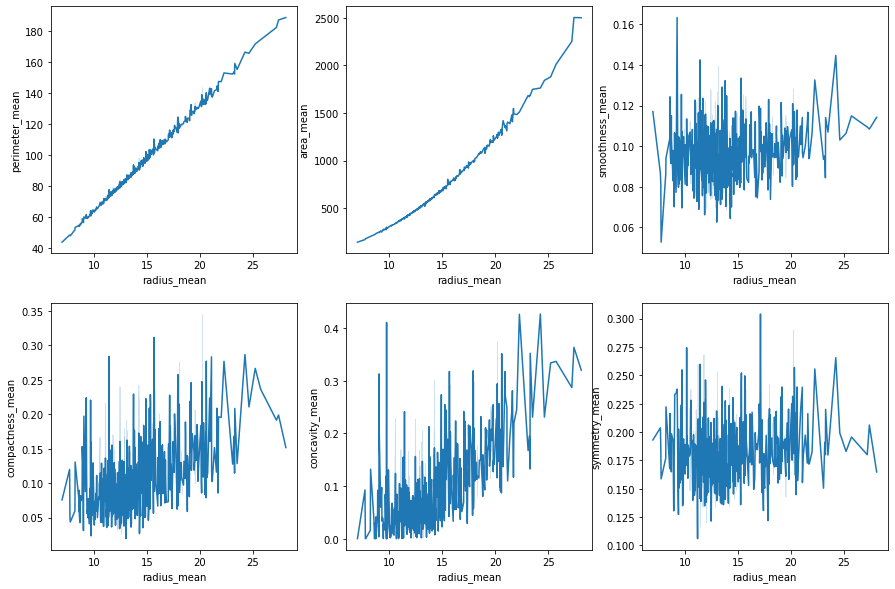

In [6]:
#Look for strong correlations so you can drop certain highly correlated features. 
fig, ax =plt.subplots(2,3, figsize=(15, 10))
sns.lineplot(x=df['radius_mean'], y=df['perimeter_mean'], ax=ax[0,0])
sns.lineplot(x=df['radius_mean'], y=df['area_mean'], ax=ax[0,1])
sns.lineplot(x=df['radius_mean'], y=df['smoothness_mean'], ax=ax[0,2])
sns.lineplot(x=df['radius_mean'], y=df['compactness_mean'], ax=ax[1,0])
sns.lineplot(x=df['radius_mean'], y=df['concavity_mean'], ax=ax[1,1])
sns.lineplot(x=df['radius_mean'], y=df['symmetry_mean'], ax=ax[1,2])

In [7]:
corr = df.corr()
corr_unstacked = corr.unstack()
corr_unstacked_sorted = corr_unstacked.sort_values(kind="quicksort", ascending=False)
corr_df=pd.Series.to_frame(corr_unstacked_sorted, name='correlation')  #Convert Series to DataFrame and name correlation column accordingly. 
high_corr_features =  corr_df[corr_df.correlation != 1]  #Remove all 1s that correspond to self correlation
print(high_corr_features.head(30))

                                 correlation
radius_mean     perimeter_mean      0.997855
perimeter_mean  radius_mean         0.997855
radius_worst    perimeter_worst     0.993708
perimeter_worst radius_worst        0.993708
area_mean       radius_mean         0.987357
radius_mean     area_mean           0.987357
area_mean       perimeter_mean      0.986507
perimeter_mean  area_mean           0.986507
area_worst      radius_worst        0.984015
radius_worst    area_worst          0.984015
area_worst      perimeter_worst     0.977578
perimeter_worst area_worst          0.977578
radius_se       perimeter_se        0.972794
perimeter_se    radius_se           0.972794
perimeter_mean  perimeter_worst     0.970387
perimeter_worst perimeter_mean      0.970387
radius_worst    radius_mean         0.969539
radius_mean     radius_worst        0.969539
perimeter_mean  radius_worst        0.969476
radius_worst    perimeter_mean      0.969476
perimeter_worst radius_mean         0.965137
radius_mea

# 2. Cleanup and preprocess data: 

Remove null for structured data, extract features if not provided, select/drop appropriate features, balance classes, scale/normalize data, etc.

In [8]:
#Drop features that are highly correlated with another feature. 
#In this case, let us just use Radius and drop area & perimeter.
cols = [c for c in df.columns if c.lower()[:4] != 'area']  #Drop all column names starting with 'area'
df=df[cols]  #Update the dataframe with new columns
cols = [c for c in df.columns if c.lower()[:9] != 'perimeter'] #Drop all column names starting with 'perimeter'
df=df[cols]  #Update the dataframe with new columns
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')


In [9]:
print(df.isnull().sum())
#df = df.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64


In [10]:
df = df.drop('Unnamed: 32', axis='columns')

In [11]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


In [13]:
####### Replace categorical values with numbers ########
print("Distribution of data: ", df['label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [16]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["label", "id"], axis=1) 
print(X.describe().T) #Needs scaling

                         count       mean       std        min        25%  \
radius_mean              569.0  14.127292  3.524049   6.981000  11.700000   
texture_mean             569.0  19.289649  4.301036   9.710000  16.170000   
smoothness_mean          569.0   0.096360  0.014064   0.052630   0.086370   
compactness_mean         569.0   0.104341  0.052813   0.019380   0.064920   
concavity_mean           569.0   0.088799  0.079720   0.000000   0.029560   
concave points_mean      569.0   0.048919  0.038803   0.000000   0.020310   
symmetry_mean            569.0   0.181162  0.027414   0.106000   0.161900   
fractal_dimension_mean   569.0   0.062798  0.007060   0.049960   0.057700   
radius_se                569.0   0.405172  0.277313   0.111500   0.232400   
texture_se               569.0   1.216853  0.551648   0.360200   0.833900   
smoothness_se            569.0   0.007041  0.003003   0.001713   0.005169   
compactness_se           569.0   0.025478  0.017908   0.002252   0.013080   

In [17]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.59375282 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.28987993 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.51430893 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.28816467 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.58833619 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.         ... 0.         0.25744136 0.10068215]]


# 3. Get data ready for training: 

Reshape data and define X_train, X_test, X_val, y_train, y_test, y_val, define augmentation

In [18]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 24)
Shape of testing data is:  (143, 24)


# 4. Define the model:
How many layers, appropriate activation functions, do we need to add dropout, appropriate optimizer, loss, metrics, use transfer learning?

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                400       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
None


# 5. Train the model: 

Ensure enough validation data for good accuracy checks during training.

In [21]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#Overwrite the model each time accuracy improves. Saves a lot of space. 
#filepath="/content/drive/MyDrive/Colab Notebooks/saved_models/best_model.hdf5" #File name includes epoch and validation accuracy.

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

callbacks_list = [early_stop]


In [22]:
#Fit with early stopping (and other) callback. 
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/100
7/7 [==============================] - 2s 92ms/step - loss: 0.6940 - accuracy: 0.5869 - val_loss: 0.6868 - val_accuracy: 0.6294
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6916 - accuracy: 0.6056 - val_loss: 0.6786 - val_accuracy: 0.6503
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 0.6845 - accuracy: 0.6244 - val_loss: 0.6703 - val_accuracy: 0.6993
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6773 - accuracy: 0.6244 - val_loss: 0.6615 - val_accuracy: 0.8182
Epoch 5/100
7/7 [==============================] - 0s 27ms/step - loss: 0.6696 - accuracy: 0.7042 - val_loss: 0.6518 - val_accuracy: 0.8601
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 0.6550 - accuracy: 0.7582 - val_loss: 0.6409 - val_accuracy: 0.8741
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6516 - accuracy: 0.7723 - val_loss: 0.6298 - val_accuracy: 0.8811
Epoch 8/100
7/7 [===

# 6. Re-train, if necessary: 
Check accuracy on test data, understand learning curves and continue training the model, if needed.

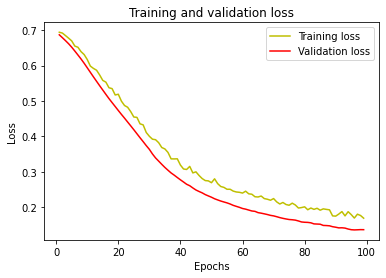

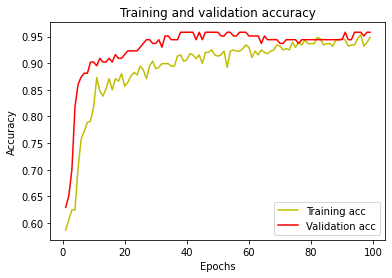

In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

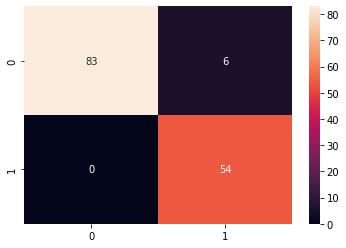

In [29]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
#Re-train, if necessary. Here we are re-training for extra 50 epochs. 
#Since we are continuing the training using same model name (model), no need to save and import the model. 
history = model.fit(X_train, y_train, verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))

# 7. Save the model for future use:

In [30]:
model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/weights-improvement-05-0.44.hdf5')

# 8. Load model (in future) and use it to predict:

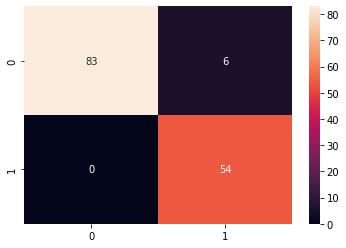

In [33]:
# Here, let us apply the loaded model to predict on our test data. 
from keras.models import load_model
my_loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/weights-improvement-05-0.44.hdf5')
y_pred_loaded_model = my_loaded_model.predict(X_test)
y_pred_loaded_model = (y_pred_loaded_model > 0.4)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_loaded_model)

sns.heatmap(cm, annot=True)